# Übung: Glätten


Aufgabe:

* Glätten eines verrauschten Signals
* Reduzieren der Datenpunkte

Tipps:

* Überprüfen des konstanten Abstands der Punkte (`df.resample("d").mean()`)
* Reduzieren der Datenpunkte durch Resamplen.
* Größe des Plots anpassen, Kurzform:

~~~
df.plot(figsize=(10,5))
~~~

* Größe des Plots anpassen, Langform:

~~~
#dpi controls relative size of font
fig = plt.figure(figsize=(6,3), dpi=150)
# create an ax object 
ax = plt.axes() 
# don't forget to tell pandas.plot() about new ax object
dg[['mean10', 'mean30']].plot(ax=ax) 
~~~

In [16]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fn = 'data/demo_tdaily_imp.csv'
df = pd.read_csv(fn) 
# short form
df = pd.read_csv(fn, parse_dates=[0], index_col=0)
df = df[['mydat']]
print(df.shape)
df.head(3)

(750, 1)


,mydat
date,
1981-02-19,16.1
1981-02-20,15.7
1981-02-21,16.6


In [17]:
dg = df.resample("d").mean() 
dg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1981-02-19 to 1983-03-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mydat   750 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [18]:
df.shape, dg.shape

((750, 1), (750, 1))

<AxesSubplot: xlabel='date'>

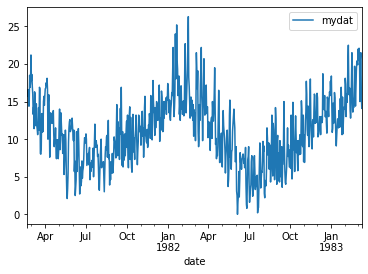

In [19]:
dg.plot()

In [26]:
dg['mean10']= dg.iloc[:,0].rolling(10, center=True, closed='both').mean()
dg['mean30']= dg.iloc[:,0].rolling(30, center=True, closed='both').mean()
dg['mean400']= dg.iloc[:,0].rolling(400, center=True, closed='both').mean()
dg

,mydat,mean10,mean30,mean400
date,,,,
1981-02-19,16.1,NaN,NaN,NaN
1981-02-20,15.7,NaN,NaN,NaN
1981-02-21,16.6,NaN,NaN,NaN
1981-02-22,16.5,NaN,NaN,NaN
1981-02-23,14.4,NaN,NaN,NaN
...,...,...,...,...
1983-03-06,15.0,19.327273,NaN,NaN
1983-03-07,20.6,19.250000,NaN,NaN
1983-03-08,21.5,NaN,NaN,NaN


<AxesSubplot: xlabel='date'>

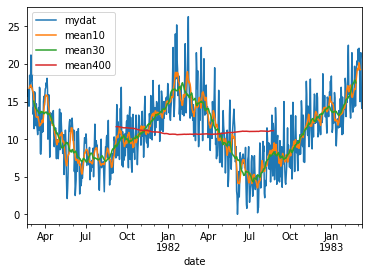

In [27]:
dg.plot()

<AxesSubplot: xlabel='date'>

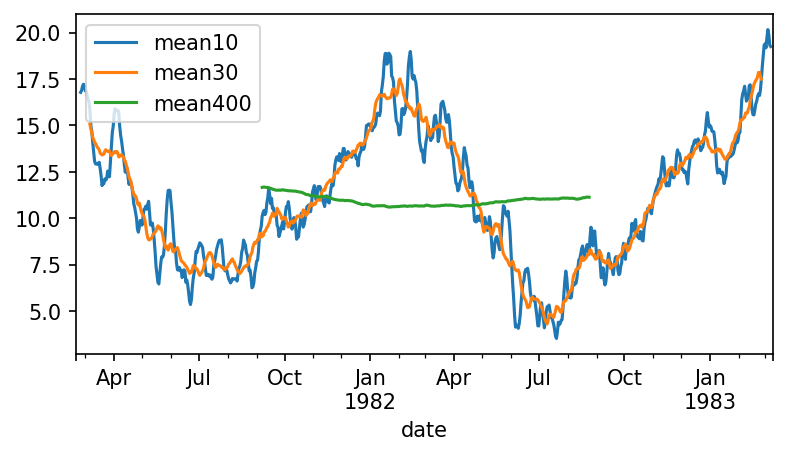

In [28]:
fig = plt.figure(figsize=(6,3), dpi=150)
ax = plt.axes()
dg[['mean10', 'mean30', 'mean400']].plot(ax=ax)


In [29]:
dh = dg.resample("w").mean()
dh.shape

(108, 4)

<AxesSubplot: xlabel='date'>

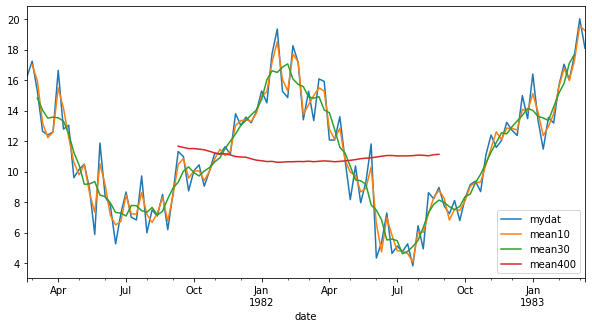

In [30]:
dh.plot(figsize=(10,5))

<AxesSubplot: xlabel='date'>

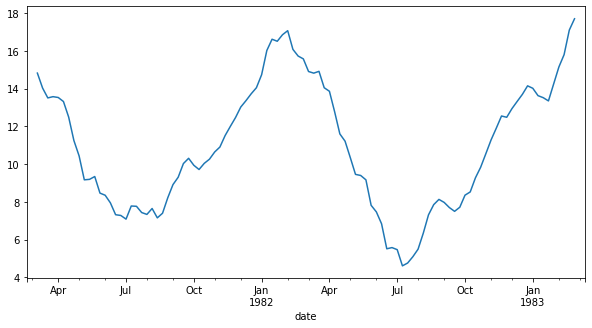

In [31]:
dh['mean30'].plot(figsize=(10,5))